<img src="https://robomous.ai/images/layout/robomous-banner.svg" alt="Robomous.ai" width=300 />

<a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

This document was created by [robomous.ai](https://robomous.ai) as support material for the article titled "*Getting started with OpenCV in Python*" and can be accessed at the following link. The content of this notebook can be used, copied, or modified according to your convenience. Robomous authorizes the free use of its educational content shared with the public from its platform.

# Starting with OpenCV in Python

If you are working with Google Colab, this library has already been installed, and you don't need to installed it.

Importing OpenCV in python is simple:

In [1]:
import cv2

We can review the current version of the library.

In [2]:
print(cv2.__version__)

4.6.0


# 1.- Opening the first image

OpenCV includes a function to load images in different formats (jpg, png, bmp, ...). Usually, we work with images in JPG format. The function has two parameters: the image file path and the mode to open the image; these parameters could be one of the following options.

*   cv2.IMREAD_COLOR
*   cv2.IMREAD_GRAYSCALE
*   cv2.IMREAD_UNCHANGED

The first option loads the image in color mode, the second in grayscale, and the third loads the image as it is (including the alpha channel).

The color images in OpenCV are loaded as an RGB image, but the order of the channels is BGR (Blue, Green, Red). This is for historical reasons, and you can change the order of the channels using the function cv2.cvtColor().

Download an example image from the internet to start working with OpenCV.

In [3]:
!wget -q --show-progress https://img.freepik.com/free-photo/selective-focus-shot-adorable-german-shepherd_181624-30217.jpg -O dog.jpg

dog.jpg             100%[===================>]  41.43K  --.-KB/s    in 0.001s  


In [4]:
image = cv2.imread('dog.jpg', cv2.IMREAD_COLOR)

We can try to show the image in this notebook by using the function imshow from matplotlib and see the result.

First, import the necessary library:

In [5]:
import matplotlib.pyplot as plt

# Define a function to display the image, avoiding the need to duplicate the code each time.
def display_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

Show the image in the notebook:

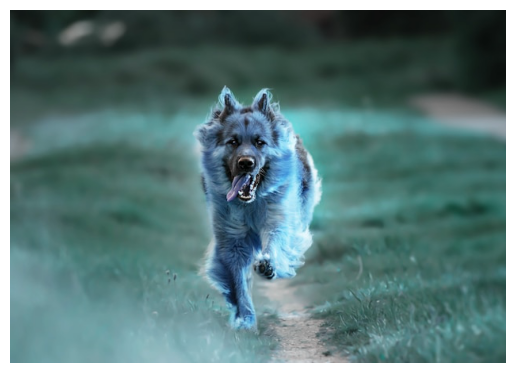

In [6]:
display_image(image)

You can see that the image is not displayed correctly. This is because the image is loaded in BGR mode, as mentioned before. We can convert the image to RGB mode using the cvtColor function.

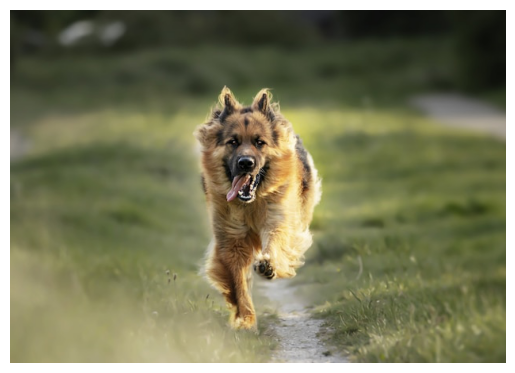

In [7]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

display_image(image_rgb)

Now, the image is displayed correctly and it is using the RGB mode.

# 2.- Manipulating the image

Some of the most common operations that we can do with images are:

- Resize the image
- Rotate the image
- Crop the image
- Change the color of the image
- Add text to the image
- Draw shapes on the image

We will to perform some of these operations in the next sections.

## 2.1 Resize the image